In [1]:
import sklearn
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Load required libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split


#A simple perceptron

https://medium.com/nerd-for-tech/flux-prediction-using-single-layer-perceptron-and-multilayer-perceptron-cf82c1341c33

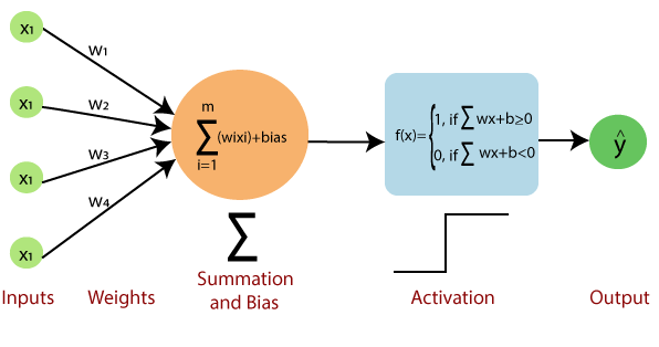

In [2]:
# Load the iris dataset
iris = datasets.load_iris()

#Dataset information:

https://archive.ics.uci.edu/ml/datasets/iris 

#Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 

      -- Iris Setosa -- represented as 0

      -- Iris Versicolour -- represented as 1

      -- Iris Virginica -- represented as 2



  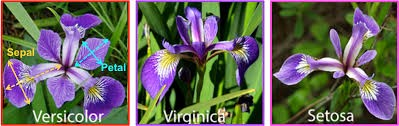

In [3]:
# Create our X and y data
X = iris.data
y = iris.target


In [4]:
# View the first five observations of the labels
y[:5]

array([0, 0, 0, 0, 0])

In [5]:
# View the first five observations of our X data. The dataset has only 4 features
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
# Split the data into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
# Train the scaler, which standarizes all the features to have mean=0 and standard deviation of 1
ss = StandardScaler()

# Apply the scaler to the X training data
X_train= ss.fit_transform(X_train)

# Apply the SAME scaler to the X test data
X_test= ss.transform(X_test)

In [8]:
# Create a perceptron object with the parameters: 100 iterations (epochs) over the data, and a learning rate of 0.1
model = Perceptron(max_iter=100,eta0=0.1, random_state=0)

# Train the perceptron
model.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100)

In [9]:
# Apply the trained perceptron on the X data to make predicts for the y test data
y_pred = model.predict(X_test)

In [10]:
# View the predicted y test data
y_pred

array([1, 0, 2, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0,
       0])

In [11]:
# View the true y test data
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [12]:
# import the metrics class
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0],
       [ 2, 10,  1],
       [ 0,  0, 13]])

Text(0.5, 257.44, 'Predicted label')

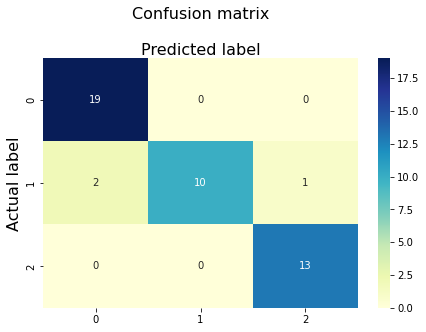

In [13]:
# import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cls_names=[0,1,2] # name  of classes
#cls_names = ['SETOSA','VERSICOLR','VIRGINICA']
fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Accuracy:%.2f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:%.2f" % metrics.precision_score(y_test, y_pred, average="weighted"))
print("Recall:%.2f" % metrics.recall_score(y_test, y_pred, average="weighted"))
print("F1 Score:%.2f" % metrics.f1_score(y_test, y_pred, average="weighted"))

Accuracy:0.93
Precision:0.94
Recall:0.93
F1 Score:0.93


# Reference:
    
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html


#Confusion Matrix for Multi-Class Classification

https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/

https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826